In [59]:
import pandas as pd
import requests
import random
import json
from citipy import citipy
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
weather_base_url = "http://api.openweathermap.org/data/2.5/weather?"

In [ ]:
# Deleted api key information before pushing to github

## List of Cities

In [15]:
# DataFrame to hold the weather data

columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
cities_df = pd.DataFrame(columns = columns)

# Generate cities list
cities_list = []

# Convert to set to remove duplicate cities
# Additional cities are collected in case the weather api didn't recognize the name
while len(set(cities_list)) < 800:
    
# Coordinates are generated using random numbers within the bounds of latitude and longitude values
    lat = round(random.randint(-90, 89) + random.random(), 6)
    lng = round(random.randint(-180, 179) + random.random(), 6)
    city = citipy.nearest_city(lat, lng)
    cities_list.append(city.city_name)
    
cities_list = list(set(cities_list))
print(len(cities_list))

800


In [53]:
# Save this random list of cities to CitiesList.csv

cities_list_df = pd.DataFrame(cities_list)
cities_list_df.to_csv("CitiesList.csv")

## Perform API Calls

In [10]:
columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
cities_df = pd.DataFrame(columns = columns)

In [48]:
# I ran this cell on slices of cities_list until there were >500 cities with weather data

i = 1
j = 0
for city in cities_list[551:560]:       
    url = weather_base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=Imperial"
    response = requests.get(url).json()
    
    try:
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        cities_df = cities_df.append({
            "City": city,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": temp_max,
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed,
            "Country": country,
            "Date": date
        }, ignore_index = True)
        print(f"city {i} processed: {city}")
        
    except KeyError:
        print(f"city {i} not found: {city}")
        j += 1

    i += 1
print(f"{j} cities not found")
print(f"{len(cities_df)} total cities in dataframe")
    
cities_df.tail()

city 1 processed: burnie
city 2 processed: bambous virieux
city 3 processed: sidi bin nur
city 4 not found: phan rang
city 5 processed: chhatarpur
city 6 processed: chernogorsk
city 7 processed: nemuro
city 8 processed: tema
city 9 processed: chernyshevskiy
1 cities not found
504 total cities in dataframe


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
499,chhatarpur,24.9000,79.6000,85.73,55,69,5.21,IN,1626304313
500,chernogorsk,53.8236,91.2842,65.77,88,40,2.24,RU,1626304313
501,nemuro,43.3236,145.5750,60.03,96,87,2.33,JP,1626304314
502,tema,5.6670,-0.0166,77.00,81,88,10.20,GH,1626304314
503,chernyshevskiy,63.0128,112.4714,52.75,68,100,11.48,RU,1626304314


In [50]:
# confirm there are no duplicate cities
cities_df["City"].value_counts().head()

swellendam                  1
sao gabriel da cachoeira    1
buluang                     1
ngunguru                    1
camacha                     1
Name: City, dtype: int64

In [52]:
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity       object
Cloudiness     object
Wind Speed    float64
Country        object
Date           object
dtype: object

In [54]:
# Convert humidity and cloudiness to int
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

In [55]:
# Summary statistics of weather data for all cities
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,504.000000,504.000000,504.000000,504.000000,504.00000,504.000000
mean,19.223210,21.306882,69.938849,71.595238,56.77381,7.736488
std,32.768155,86.979543,13.581590,19.853210,38.10361,5.549897
min,-54.800000,-173.300000,29.860000,6.000000,0.00000,0.000000
25%,-6.842575,-56.142300,60.720000,63.000000,17.00000,3.440000
50%,23.789300,22.945800,71.610000,77.000000,71.00000,6.330000
75%,45.913550,98.413450,79.777500,86.000000,93.00000,10.360000
max,78.218600,179.316700,102.650000,100.000000,100.00000,32.210000


In [56]:
# No cities had humidity > 100
cities_df.loc[cities_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Latitude vs Temperature Plot

### All Cities

In [58]:
# Split into hemispheres to plot separate regression lines
north_df = cities_df.loc[cities_df["Lat"] > 0]
south_df = cities_df.loc[cities_df["Lat"] < 0]

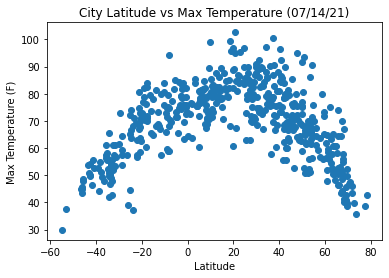

In [75]:
# All cities
plt.scatter(cities_df["Lat"], cities_df["Max Temp"])
plt.title("City Latitude vs Max Temperature (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/AllTemp")

plt.show()

The latitude vs temperature plot shows that weather generally gets hotter moving toward the equator and cooler moving away. 

### Northern Hemisphere

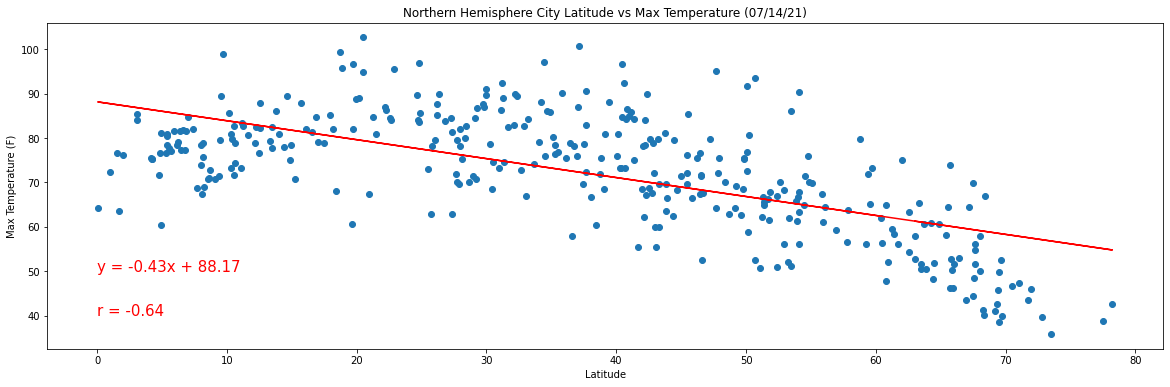

In [73]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_df["Lat"], north_df["Max Temp"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (20, 6))
plt.scatter(north_df["Lat"], north_df["Max Temp"])
plt.plot(north_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 50), fontsize = 15, color = "red")
plt.annotate(f"r = {round(rvalue, 2)}", (0, 40), fontsize = 15, color = "red")

plt.title("Northern Hemisphere City Latitude vs Max Temperature (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/NorthTemp.png")

plt.show()

### Southern Hemisphere

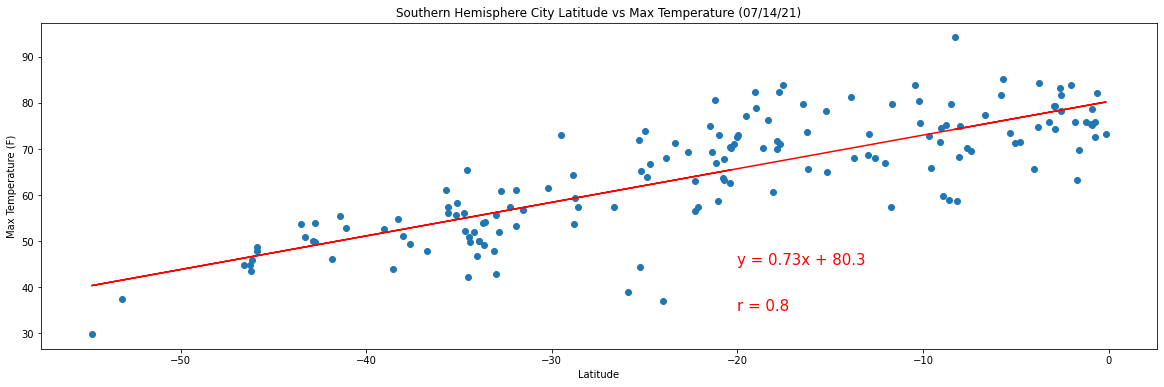

In [74]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_df["Lat"], south_df["Max Temp"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (20, 6))
plt.scatter(south_df["Lat"], south_df["Max Temp"])
plt.plot(south_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-20, 45), fontsize = 15, color = "red")
plt.annotate(f"r = {round(rvalue, 2)}", (-20, 35), fontsize = 15, color = "red")


plt.title("Southern Hemisphere City Latitude vs Max Temperature (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/SouthTemp.png")

plt.show()

The relationship between max temperature and distance from the equator is more strongly correlated in the southern hemisphere. The max temperature increases more rapidly moving toward the equator in the southern hemisphere than in the northern hemisphere.

## Humidity (%) vs Latitude

### All Cities

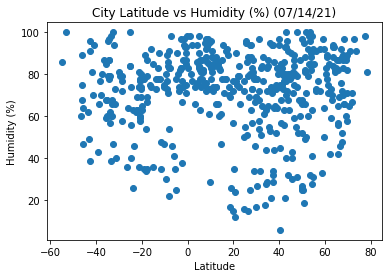

In [76]:
# All cities
plt.scatter(cities_df["Lat"], cities_df["Humidity"])
plt.title("City Latitude vs Humidity (%) (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/AllHumidity")

plt.show()

There does not appear to be a strong relationship between today's humidity and the latitude of the city.

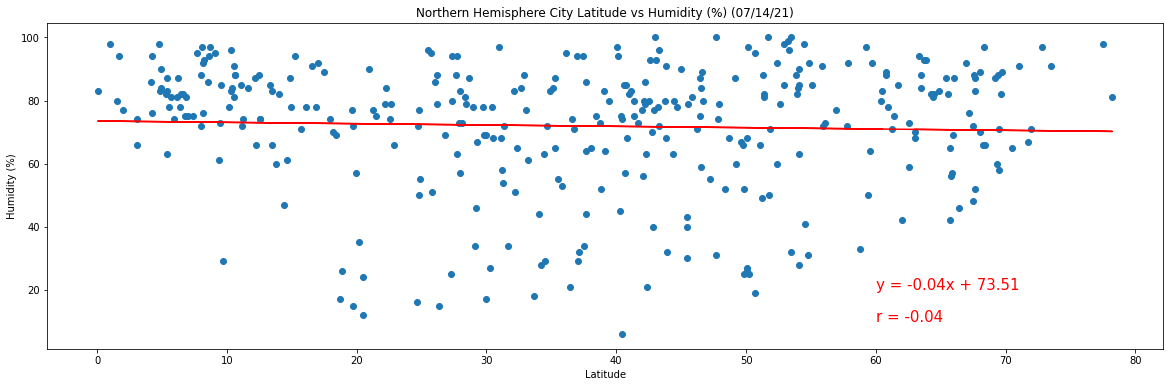

In [78]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_df["Lat"], north_df["Humidity"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (20, 6))
plt.scatter(north_df["Lat"], north_df["Humidity"])
plt.plot(north_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (60, 20), fontsize = 15, color = "red")
plt.annotate(f"r = {round(rvalue, 2)}", (60, 10), fontsize = 15, color = "red")

plt.title("Northern Hemisphere City Latitude vs Humidity (%) (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/NorthHumidity.png")

plt.show()

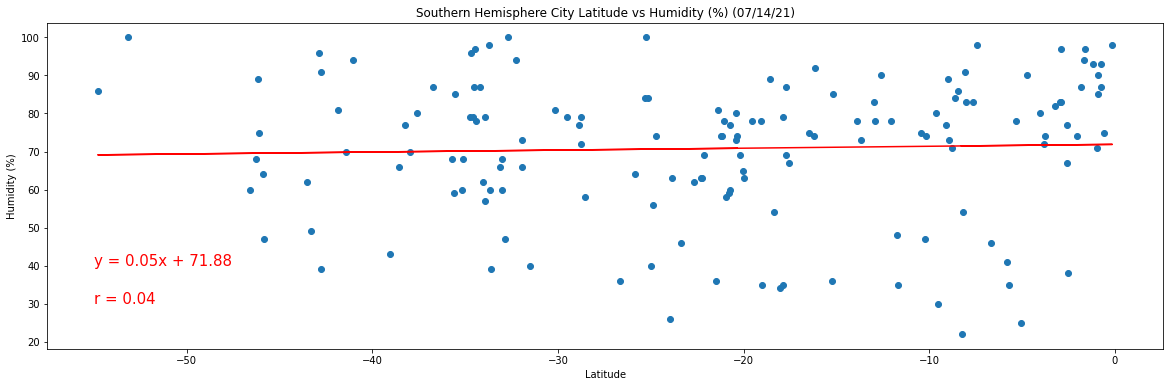

In [80]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_df["Lat"], south_df["Humidity"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (20, 6))
plt.scatter(south_df["Lat"], south_df["Humidity"])
plt.plot(south_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-55, 40), fontsize = 15, color = "red")
plt.annotate(f"r = {round(rvalue, 2)}", (-55, 30), fontsize = 15, color = "red")

plt.title("Southern Hemisphere City Latitude vs Humidity (%) (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/SouthHumidity.png")

plt.show()

For both hemispheres the r value and slope are close to 0, supporting that there is no strong relationship between latitude and humidity.

## Cloudiness (%) vs Latitude

### All Cities

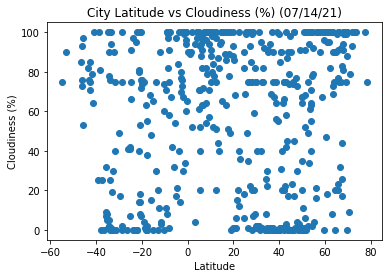

In [81]:
# All cities
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"])
plt.title("City Latitude vs Cloudiness (%) (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/AllClouds")

plt.show()

Latitude and cloudiness also do not appear to be correlated.

### Northern Hemisphere

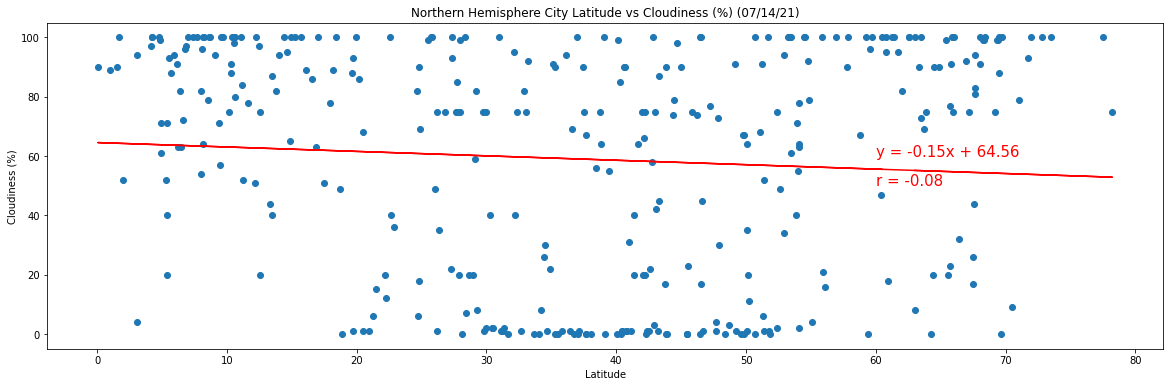

In [82]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_df["Lat"], north_df["Cloudiness"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (20, 6))
plt.scatter(north_df["Lat"], north_df["Cloudiness"])
plt.plot(north_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (60, 60), fontsize = 15, color = "red")
plt.annotate(f"r = {round(rvalue, 2)}", (60, 50), fontsize = 15, color = "red")

plt.title("Northern Hemisphere City Latitude vs Cloudiness (%) (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/NorthClouds.png")

plt.show()

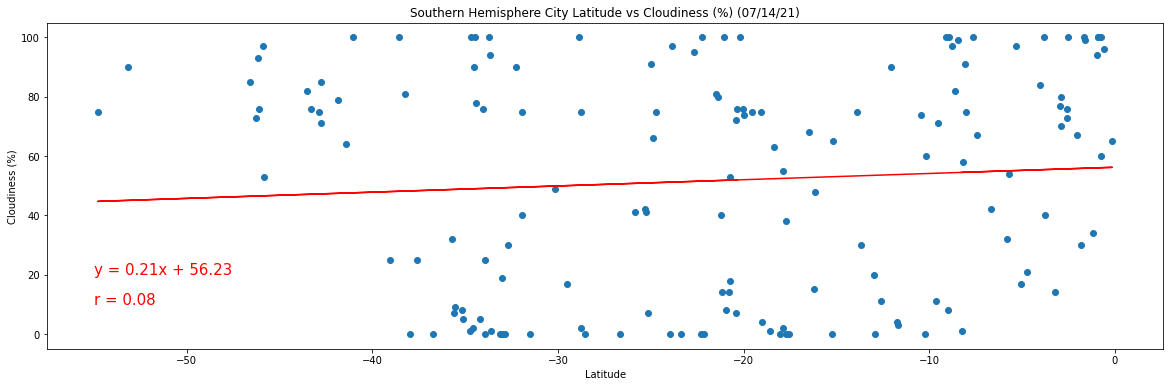

In [84]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_df["Lat"], south_df["Cloudiness"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (20, 6))
plt.scatter(south_df["Lat"], south_df["Cloudiness"])
plt.plot(south_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-55, 20), fontsize = 15, color = "red")
plt.annotate(f"r = {round(rvalue, 2)}", (-55, 10), fontsize = 15, color = "red")

plt.title("Southern Hemisphere City Latitude vs Cloudiness (%) (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/SouthClouds.png")

plt.show()

The r values indicate that latitude and humidity are not correlated. Today was clear at cities between 30-50 degrees and cloudy between 5-15 degrees latitude.

## Wind Speed (mph) vs Latitude